In [311]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [312]:
csv_path = './3_sensitivity/globalcomp.csv'
workload_list = ['mix1', 'mix2', 'mix3', 'mix4']
scheme_list = ['256B Performance', '64B Performance']
workload_dict = {item: item for item in workload_list}
scheme_dict = {
    '256B Performance': '256 B',
    '64B Performance': '64 B (Baryon)',
    }

fig_title = 'Normalized Performance'
fig_name = 'graph_globalcomp'
fig_ylim = (0, 1.1)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1]+0.01, 0.25))
fig_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [4, 0]]
assert len(fig_bar_colors) == len(scheme_dict)

# pprint(fig_yticks)

In [313]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 2)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [314]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
fig_xlabels = []
fig_xticks = []
fig_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        fig_data_2darr.append(row_value)
        fig_xlabels.append(workload_fullname)
        xtick += 1
        fig_xticks.append(xtick)
assert len(fig_data_2darr) == len(fig_xlabels) == len(fig_xticks)

pprint(fig_data_2darr)

[[0.990066225, 1.0],
 [0.9270833337000001, 1.0],
 [1.0518987340000001, 1.0],
 [0.974654378, 1.0]]


In [315]:
''' CF hit rate '''
CF_scheme_list = ['256B CF', '64B CF', '128MB CF']
CF_scheme_dict = {
    '256B CF': '256 B',
    '64B CF': '64 B',
}
csv_hd = pd.read_csv(csv_path, sep=',')
CF_xlabels = []
CF_xticks = []
CF_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in CF_scheme_dict):
                row_value.append(row[col])
        CF_data_2darr.append(row_value)
        CF_xlabels.append(workload_fullname)
        xtick += 1
        CF_xticks.append(xtick)
assert len(CF_data_2darr) == len(CF_xlabels) == len(CF_xticks)

pprint(CF_data_2darr)

[[1.48, 1.46], [1.31, 1.27], [1.59, 1.41], [1.29, 1.28]]


In [316]:
''' algo hit rate '''
algo_scheme_list = ['FPC CF', 'BDI CF']
algo_scheme_dict = {
    'FPC CF': 'FPC',
    'BDI CF': 'BDI',
}
csv_hd = pd.read_csv(csv_path, sep=',')
algo_xlabels = []
algo_xticks = []
algo_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in algo_scheme_dict):
                row_value.append(row[col])
        algo_data_2darr.append(row_value)
        algo_xlabels.append(workload_fullname)
        xtick += 1
        algo_xticks.append(xtick)
# assert len(algo_data_2darr) == len(algo_xlabels) == len(algo_xticks)
algo_data_2darr = np.transpose(algo_data_2darr)
pprint(algo_data_2darr)

array([[1.45, 1.16, 1.41, 1.1 ],
       [1.43, 1.26, 1.22, 1.25]])


10.0
[-0.21666666666666667, 0.21666666666666667]
[0.7833333333333333, 1.2166666666666668]
[1.7833333333333332, 2.216666666666667]
[2.783333333333333, 3.216666666666667]


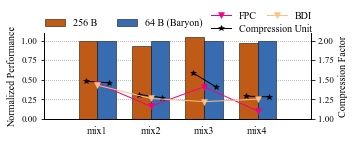

In [317]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
ax2 = ax.twinx()
easypyplot.format.turn_off_box(ax, twinx_axes=ax2)

h = easypyplot.barchart.draw(
    ax, fig_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=fig_xlabels,
    xticks=fig_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    prop=ft,
    colors=fig_bar_colors)

h2 = []
# easypyplot.format.turn_off_box(ax2)
for group_id in range(len(workload_dict)):
    # CF_xticks = list(np.arange(fig_xticks[group_id] - 1/3))
    gap = 1./3 - 1.0 * fig_bar_width / 6
    CF_xticks = [fig_xticks[group_id] - gap, fig_xticks[group_id] + gap]
    print(CF_xticks)
    h2 += ax2.plot(CF_xticks, CF_data_2darr[group_id],
                marker='*',
                linewidth = '1.0',
                color = '#000000',
                markersize = '6.0',
                # prop = ft
                )

h3 = []
# easypyplot.format.turn_off_box(ax2)
algo_color_set = [easypyplot.color.COLOR_SET[i] for i in [2, 5]]
for group_id in range(2):
    # CF_xticks = list(np.arange(fig_xticks[group_id] - 1/3))
    gap = 1./3 - 1.0 * fig_bar_width / 6
    # new_algo_xticks = [item + gap for item in algo_xticks]
    h3 += ax2.plot(algo_xticks, algo_data_2darr[group_id],
                marker='v',
                linewidth = '1.0',
                color=algo_color_set[group_id],
                markersize = '6.0',
                # prop=ft, # Uncomment if easypyplot supports font
                )

''' x axis '''
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.set_xticks(fig_xticks)
ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)

''' y axis '''
ax.yaxis.grid(True)
ax.set_ylim(fig_ylim)
ax.set_yticks(fig_yticks)
ax.set_ylabel(fig_title, multialignment='center', fontproperties=ft)

cf_ylim = [1., 2.1]
ax2.set_ylim(cf_ylim)
cf_yticks = list(np.arange(cf_ylim[0], cf_ylim[1]+0.01, 0.25))
ax2.set_yticks(cf_yticks)
ax2.set_ylabel('Compression Factor', multialignment='center', fontproperties=ft)

''' values on top of each bar '''
# for group_id in range(len(workload_dict)):
#     for entry_id in range(len(scheme_dict)):
#         bar_value = fig_data_2darr[group_id][entry_id]
#         bar_x = ax.get_xticks()[group_id] + fig_bar_width / len(scheme_dict) * (entry_id - len(scheme_dict) / 2)
#         bar_text = str('{:.2f}'.format(bar_value))
#         ax.text(bar_x, bar_value + 0.1, bar_text, ha='left', va='top',
#                 fontsize=fig_label_fontsize,
#                 # rotation=90,
#                 fontproperties=ft,
#                 )

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(h, legend, loc='upper center', bbox_to_anchor=(0.35, 1.1),
        ncol=3, frameon=False, prop=ft)

legend = ['Compression Unit']
fig.legend(h2, legend, loc='upper right', bbox_to_anchor=(0.9, 1.06),
        ncol=1, frameon=False, numpoints=1, prop=ft)

legend = ['FPC', 'BDI']
fig.legend(h3, legend, loc='center right', bbox_to_anchor=(0.9, 1.05),
        ncol=2, frameon=False,
        columnspacing=1,
        numpoints=1,
        prop=ft,
        )

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.8)

In [318]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures